In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv('Customer Churn.csv')
df

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3145         721.980      0  
3146         261.210      0  
3147         280.320      0  
3148        1077.640      0  
3149         100.680      1  

[3150 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
df.describe(include = 'all')

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

In [5]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

# Exploratory Data Analysis (EDA)

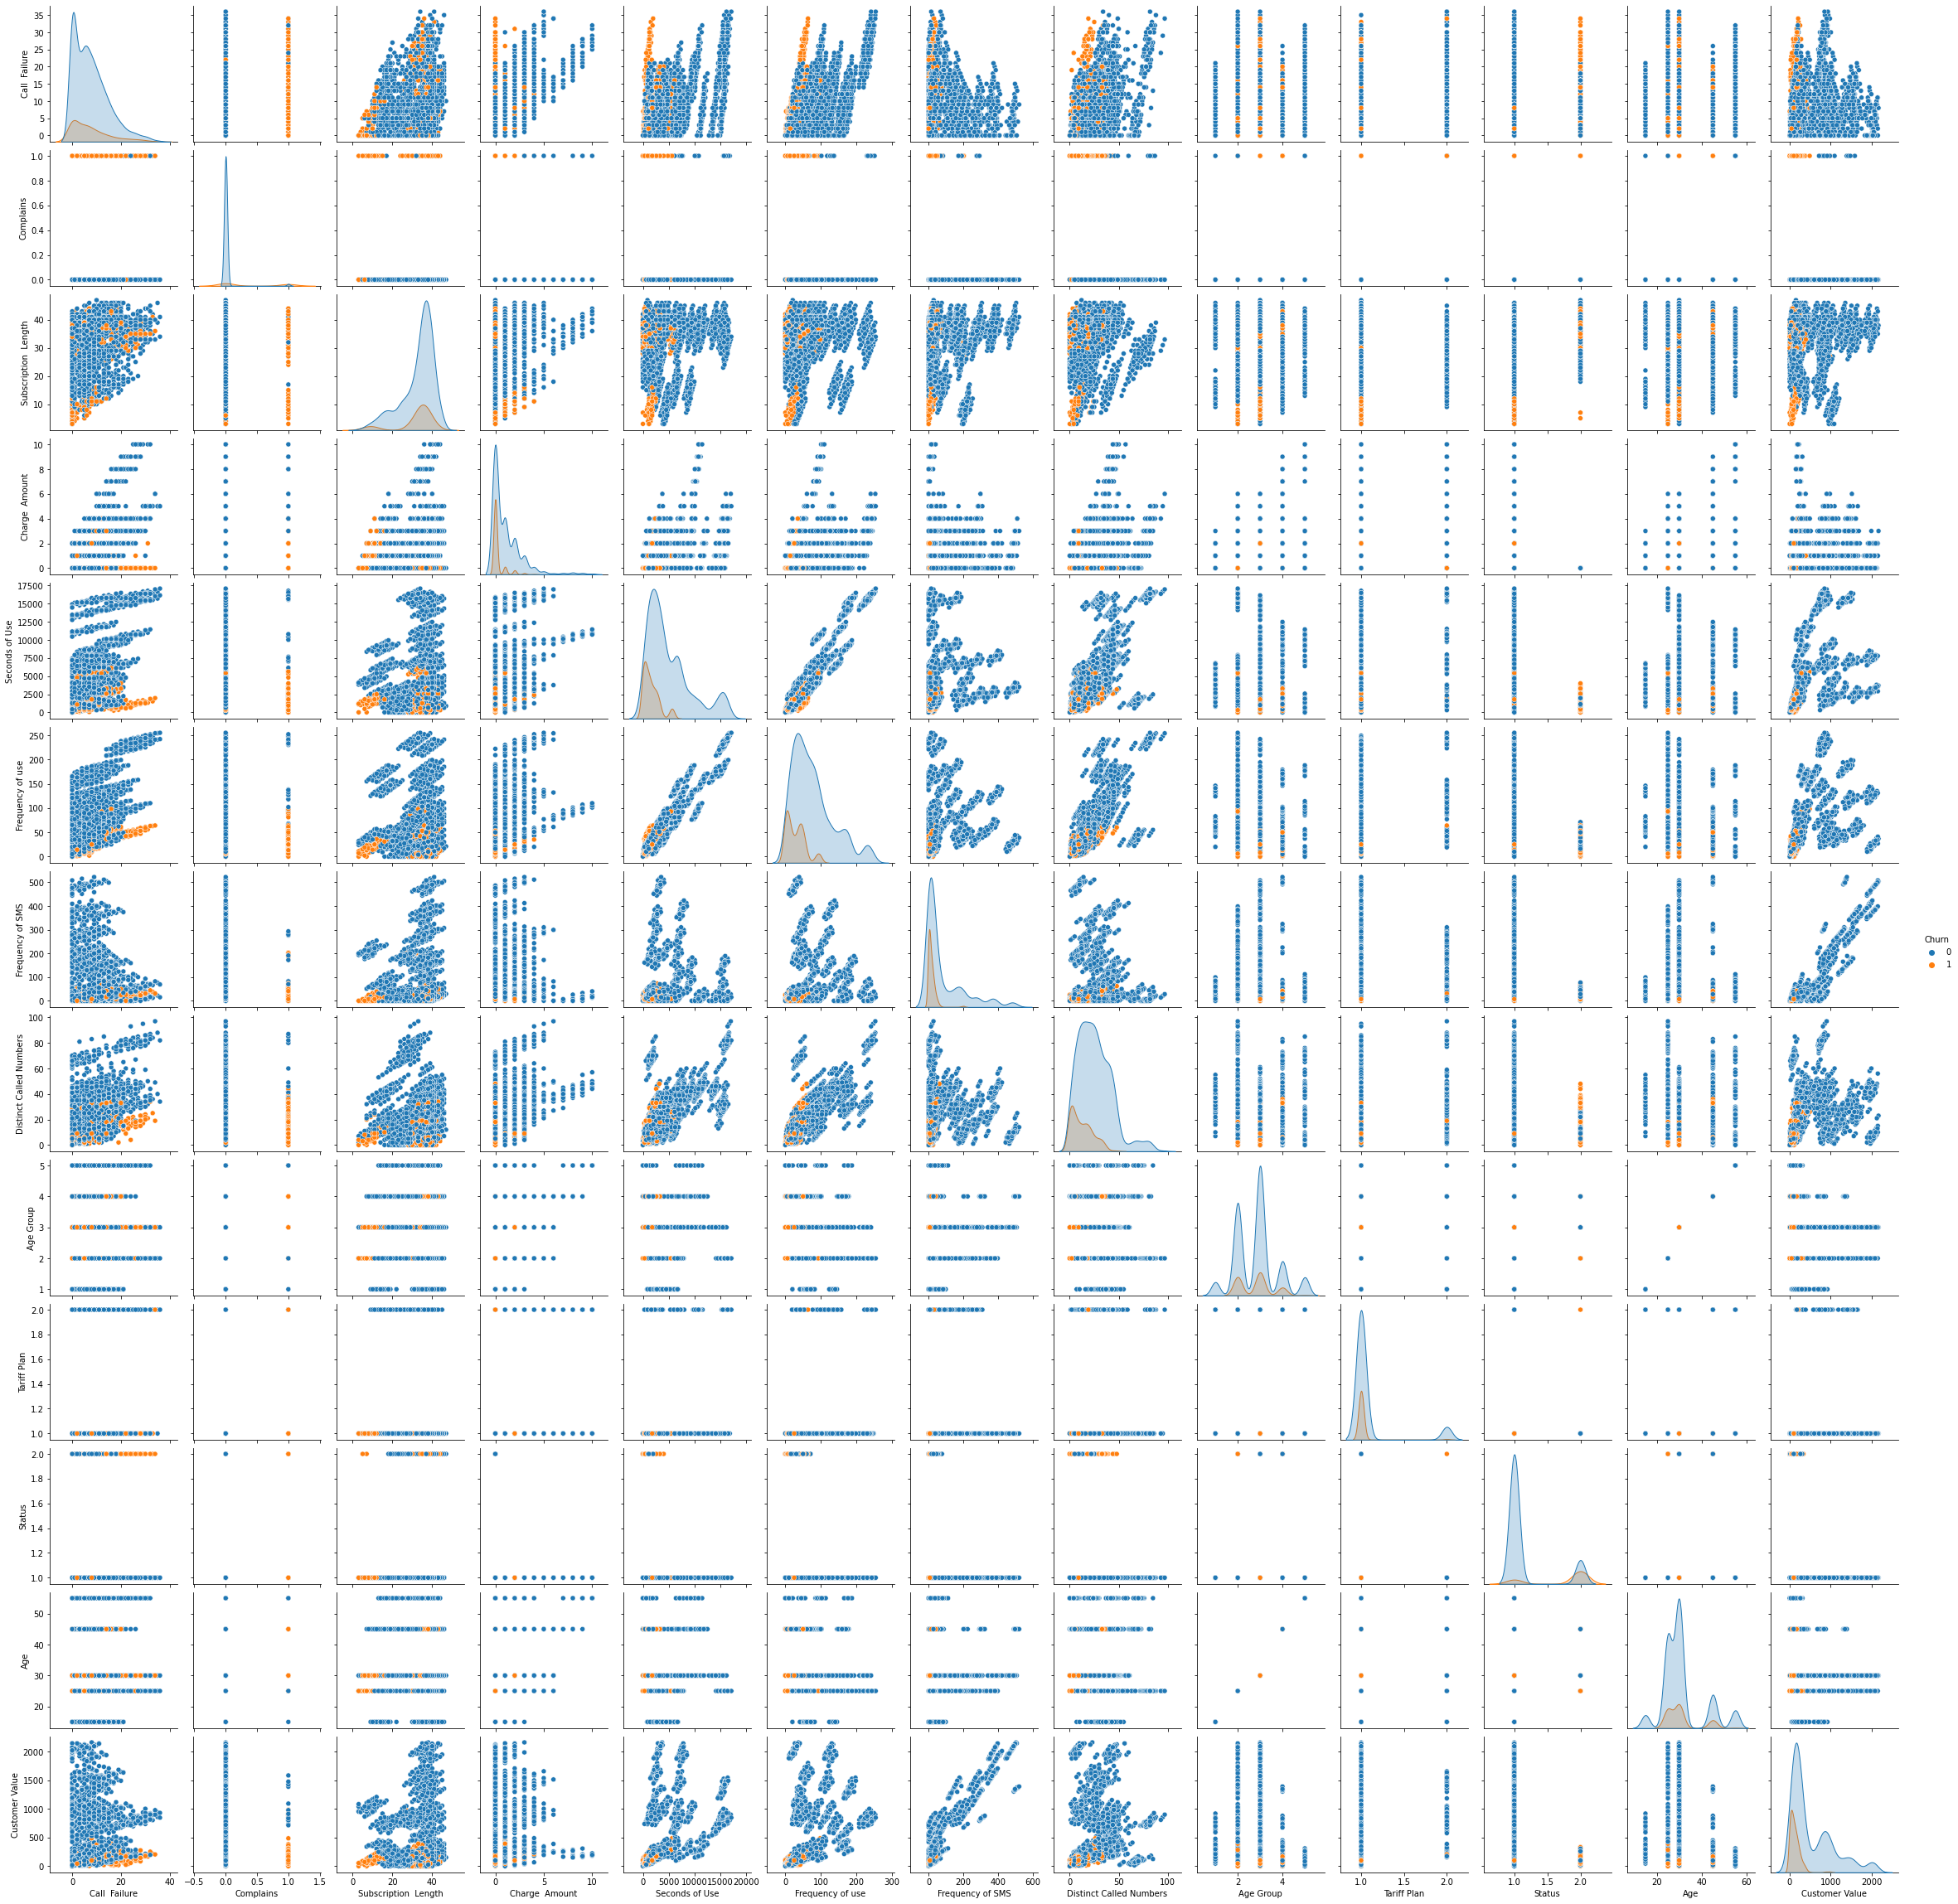

In [6]:
sns.pairplot(df, kind = 'scatter',hue = 'Churn')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

### 1) Call  Failure

In [8]:
df['Call  Failure']

0        8
1        0
2       10
3       10
4        3
        ..
3145    21
3146    17
3147    13
3148     7
3149     8
Name: Call  Failure, Length: 3150, dtype: int64

In [9]:
df['Call  Failure'].isna().sum()     # Checking for null values

0

In [10]:
# This feature does not contain any null values

#### Detecting Outliers

<AxesSubplot:xlabel='Call  Failure', ylabel='Density'>

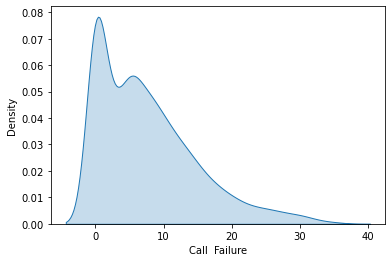

In [11]:
sns.kdeplot(x = df['Call  Failure'], fill = True)

In [12]:
# Finding out outliers using zscore method

In [13]:
def get_outliers(column):
    
    outliers_list = []
    mean = column.mean()
    std = column.std()
    threshold = 3
    
    for i in column.values:
        zscore = (i - mean)/std
        
        if np.abs(zscore) > threshold:
            outliers_list.append(i)
            
    return outliers_list

In [14]:
print(get_outliers(df['Call  Failure']))

[30, 30, 31, 31, 30, 30, 33, 31, 33, 31, 31, 35, 33, 31, 35, 32, 30, 32, 34, 32, 30, 34, 30, 30, 30, 30, 32, 30, 32, 32, 30, 32, 36, 34, 32, 36, 30, 30, 30, 30]


<AxesSubplot:xlabel='Call  Failure'>

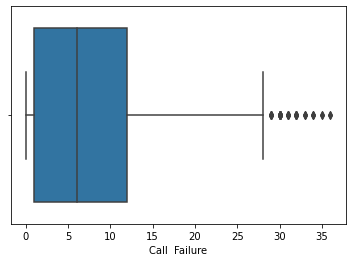

In [15]:
sns.boxplot(x = df['Call  Failure'])

In [16]:
# iqr (Interquantile Method) method

In [17]:
q1 = df['Call  Failure'].quantile(0.25)
q2 = df['Call  Failure'].quantile(0.50)
q3 = df['Call  Failure'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 28.5
Lower tail : -15.5


In [18]:
# Checking Skewness

In [19]:
df['Call  Failure'].skew()

1.0897518136033963

In [20]:
# Highly Positively Skewed 

In [21]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 2) Complains

In [22]:
df['Complains']

0       0
1       0
2       0
3       0
4       0
       ..
3145    0
3146    0
3147    0
3148    0
3149    1
Name: Complains, Length: 3150, dtype: int64

In [23]:
df['Complains'].isna().sum()

0

In [24]:
df['Complains'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Complains', ylabel='count'>

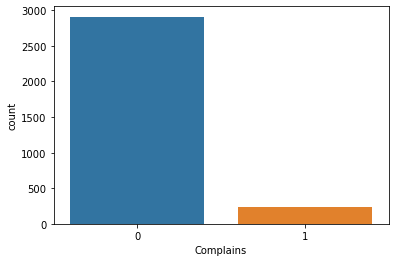

In [25]:
sns.countplot(x = df['Complains'])

In [26]:
# This feature does not contain any null values and already numerical, so no need to apply
# any preprocessing technique here

### 3) Subscription  Length

In [27]:
df['Subscription  Length']

0       38
1       39
2       37
3       38
4       38
        ..
3145    19
3146    17
3147    18
3148    11
3149    11
Name: Subscription  Length, Length: 3150, dtype: int64

In [28]:
df['Subscription  Length'].isna().sum()

0

In [29]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='Subscription  Length', ylabel='Density'>

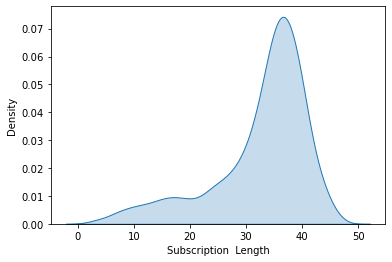

In [30]:
sns.kdeplot(x = df['Subscription  Length'], fill = True)

In [31]:
# Finding out outliers using zscore method

In [32]:
get_outliers(df['Subscription  Length'])

[5, 5, 3, 3, 6, 6, 4, 4, 5, 5, 3, 3, 3, 3, 4, 4, 6, 6, 3, 3, 6, 6, 5, 5, 6, 6]

<AxesSubplot:xlabel='Subscription  Length'>

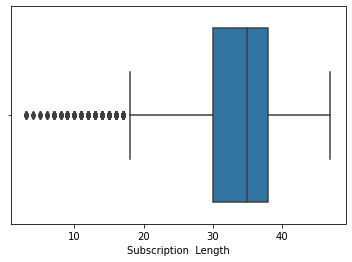

In [33]:
sns.boxplot(x = df['Subscription  Length'])

In [34]:
# iqr (Interquantile Method) method

In [35]:
q1 = df['Subscription  Length'].quantile(0.25)
q2 = df['Subscription  Length'].quantile(0.50)
q3 = df['Subscription  Length'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 50.0
Lower tail : 18.0


In [36]:
# Checking Skewness

In [37]:
df['Subscription  Length'].skew()

-1.3000149541562744

In [38]:
# Highly Negatively Skewed 

In [39]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 4) Charge  Amount

In [40]:
df['Charge  Amount']

0       0
1       0
2       0
3       0
4       0
       ..
3145    2
3146    1
3147    4
3148    2
3149    2
Name: Charge  Amount, Length: 3150, dtype: int64

In [41]:
df['Charge  Amount'].isna().sum()

0

In [42]:
df['Charge  Amount'].unique()

array([ 0,  1,  2,  3,  8,  4,  9,  7,  5, 10,  6], dtype=int64)

<AxesSubplot:xlabel='Charge  Amount', ylabel='count'>

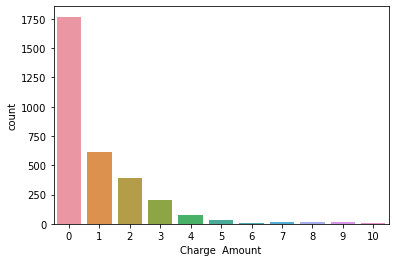

In [43]:
sns.countplot(x = df['Charge  Amount'])

In [44]:
# This feature does not contain any null values 

### 5) Seconds of Use

In [45]:
df['Seconds of Use']

0       4370
1        318
2       2453
3       4198
4       2393
        ... 
3145    6697
3146    9237
3147    3157
3148    4695
3149    1792
Name: Seconds of Use, Length: 3150, dtype: int64

In [46]:
df['Seconds of Use'].isna().sum()

0

In [47]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='Seconds of Use', ylabel='Density'>

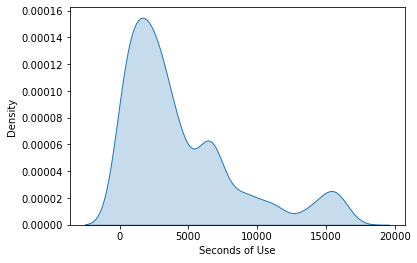

In [48]:
sns.kdeplot(x = df['Seconds of Use'], fill = True)

In [49]:
# Finding out outliers using zscore method

In [50]:
get_outliers(df['Seconds of Use'])

[17090]

<AxesSubplot:xlabel='Seconds of Use'>

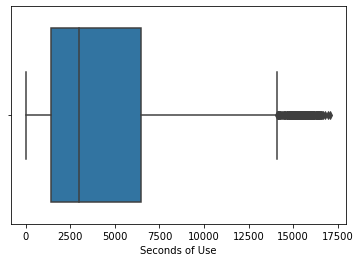

In [51]:
sns.boxplot(x = df['Seconds of Use'])

In [52]:
# iqr (Interquantile Method) method

In [53]:
q1 = df['Seconds of Use'].quantile(0.25)
q2 = df['Seconds of Use'].quantile(0.50)
q3 = df['Seconds of Use'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 14108.75
Lower tail : -6239.25


In [54]:
# Checking Skewness

In [55]:
df['Seconds of Use'].skew()

1.3219428645354965

In [56]:
# Highly Positively Skewed 

In [57]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 6) Frequency of use

In [58]:
df['Frequency of use']

0        71
1         5
2        60
3        66
4        58
       ... 
3145    147
3146    177
3147     51
3148     46
3149     25
Name: Frequency of use, Length: 3150, dtype: int64

In [59]:
df['Frequency of use'].isna().sum()

0

In [60]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='Frequency of use', ylabel='Density'>

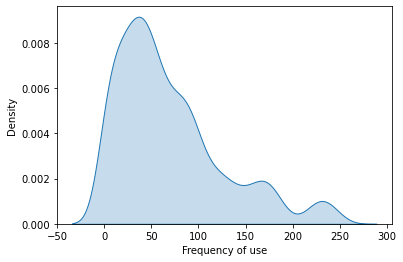

In [61]:
sns.kdeplot(x = df['Frequency of use'], fill = True)

In [62]:
# Finding out outliers using zscore method

In [63]:
print(get_outliers(df['Frequency of use']))

[248, 246, 248, 244, 244, 249, 242, 242, 243, 244, 247, 246, 242, 254, 252, 254, 250, 245, 243, 250, 242, 255, 244, 244]


<AxesSubplot:xlabel='Frequency of use'>

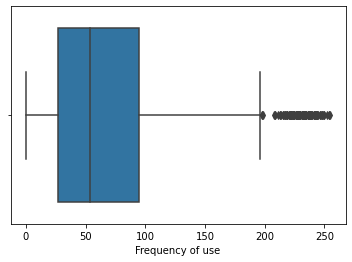

In [64]:
sns.boxplot(x = df['Frequency of use'])

In [65]:
# iqr (Interquantile Method) method

In [66]:
q1 = df['Frequency of use'].quantile(0.25)
q2 = df['Frequency of use'].quantile(0.50)
q3 = df['Frequency of use'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 197.0
Lower tail : -75.0


In [67]:
# Checking Skewness

In [68]:
df['Frequency of use'].skew()

1.1441664249623964

In [69]:
# Highly Positively Skewed 

In [70]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 7) Frequency of SMS

In [71]:
df['Frequency of SMS']

0         5
1         7
2       359
3         1
4         2
       ... 
3145     92
3146     80
3147     38
3148    222
3149      7
Name: Frequency of SMS, Length: 3150, dtype: int64

In [72]:
df['Frequency of SMS'].isna().sum()

0

In [73]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='Frequency of SMS', ylabel='Density'>

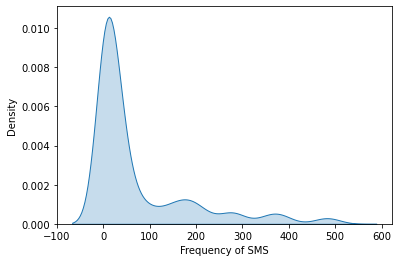

In [74]:
sns.kdeplot(x = df['Frequency of SMS'], fill = True)

In [75]:
# Finding out outliers using zscore method

In [76]:
print(get_outliers(df['Frequency of SMS']))

[483, 488, 478, 493, 473, 498, 468, 494, 472, 504, 462, 515, 416, 451, 492, 474, 475, 491, 491, 458, 483, 483, 476, 481, 471, 486, 466, 491, 461, 487, 465, 497, 455, 508, 444, 485, 467, 468, 484, 484, 451, 476, 476, 490, 495, 485, 500, 480, 505, 475, 501, 479, 511, 412, 469, 522, 423, 458, 499, 481, 482, 498, 498, 465, 490, 490]


<AxesSubplot:xlabel='Frequency of SMS'>

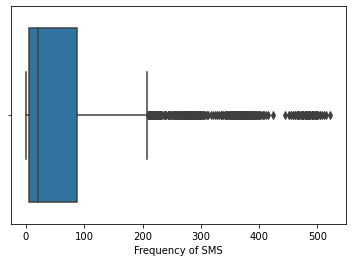

In [77]:
sns.boxplot(x = df['Frequency of SMS'])

In [78]:
# iqr (Interquantile Method) method

In [79]:
q1 = df['Frequency of SMS'].quantile(0.25)
q2 = df['Frequency of SMS'].quantile(0.50)
q3 = df['Frequency of SMS'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 208.5
Lower tail : -115.5


In [80]:
# Checking Skewness

In [81]:
df['Frequency of SMS'].skew()

1.9741417670137227

In [82]:
# Highly Positively Skewed 

In [83]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 8) Distinct Called Numbers

In [84]:
df['Distinct Called Numbers']

0       17
1        4
2       24
3       35
4       33
        ..
3145    44
3146    42
3147    21
3148    12
3149     9
Name: Distinct Called Numbers, Length: 3150, dtype: int64

In [85]:
df['Distinct Called Numbers'].isna().sum()

0

In [86]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='Distinct Called Numbers', ylabel='Density'>

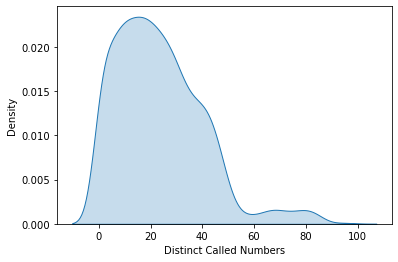

In [87]:
sns.kdeplot(x = df['Distinct Called Numbers'], fill = True)

In [88]:
# Finding out outliers using zscore method

In [89]:
print(get_outliers(df['Distinct Called Numbers']))

[80, 82, 78, 84, 76, 86, 85, 95, 83, 84, 76, 83, 77, 79, 81, 80, 80, 80, 80, 78, 80, 76, 82, 84, 83, 93, 81, 82, 81, 77, 79, 78, 78, 78, 78, 82, 84, 80, 86, 78, 88, 76, 76, 87, 77, 97, 85, 86, 78, 85, 79, 81, 83, 82, 82, 82, 82]


<AxesSubplot:xlabel='Distinct Called Numbers'>

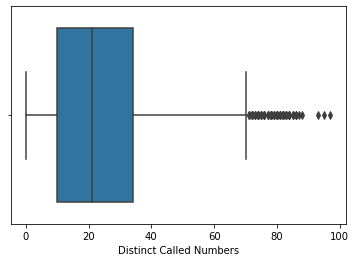

In [90]:
sns.boxplot(x = df['Distinct Called Numbers'])

In [91]:
# iqr (Interquantile Method) method

In [92]:
q1 = df['Distinct Called Numbers'].quantile(0.25)
q2 = df['Distinct Called Numbers'].quantile(0.50)
q3 = df['Distinct Called Numbers'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 70.0
Lower tail : -26.0


In [93]:
# Checking Skewness

In [94]:
df['Distinct Called Numbers'].skew()

1.029402147584413

In [95]:
# Highly Positively Skewed 

In [96]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 9) Age Group

In [97]:
df['Age Group']

0       3
1       2
2       3
3       1
4       1
       ..
3145    2
3146    5
3147    3
3148    3
3149    3
Name: Age Group, Length: 3150, dtype: int64

In [98]:
df['Age Group'].isna().sum()

0

In [99]:
df['Age Group'].unique()

array([3, 2, 1, 4, 5], dtype=int64)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

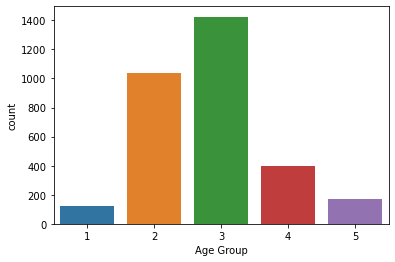

In [100]:
sns.countplot(x = df['Age Group'])

In [101]:
# This feature does not contain any null values 

### 10) Tariff Plan

In [102]:
df['Tariff Plan']

0       1
1       1
2       1
3       1
4       1
       ..
3145    2
3146    1
3147    1
3148    1
3149    1
Name: Tariff Plan, Length: 3150, dtype: int64

In [103]:
df['Tariff Plan'].isna().sum()

0

In [104]:
df['Tariff Plan'].unique()

array([1, 2], dtype=int64)

<AxesSubplot:xlabel='Tariff Plan', ylabel='count'>

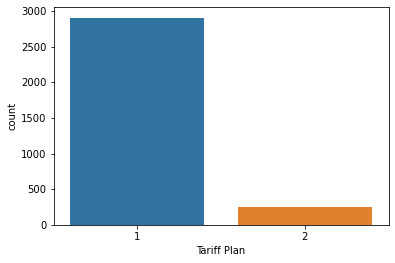

In [105]:
sns.countplot(x = df['Tariff Plan'])

In [106]:
# This feature does not contain any null values 

### 11) Status

In [107]:
df['Status']

0       1
1       2
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: Status, Length: 3150, dtype: int64

In [108]:
df['Status'].isna().sum()

0

In [109]:
df['Status'].unique()

array([1, 2], dtype=int64)

<AxesSubplot:xlabel='Status', ylabel='count'>

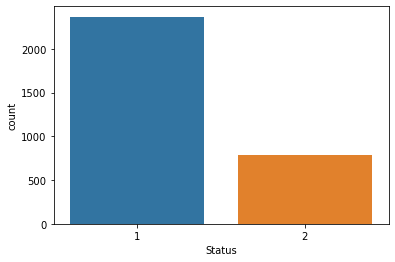

In [110]:
sns.countplot(x = df['Status'])

In [111]:
# This feature does not contain any null values 

### 12) Age

In [112]:
df['Age']

0       30
1       25
2       30
3       15
4       15
        ..
3145    25
3146    55
3147    30
3148    30
3149    30
Name: Age, Length: 3150, dtype: int64

In [113]:
df['Age'].isna().sum()

0

In [114]:
df['Age'].unique()

array([30, 25, 15, 45, 55], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='count'>

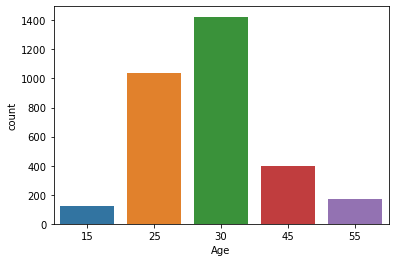

In [115]:
sns.countplot(x = df['Age'])

In [116]:
# This feature does not contain any null values but feature df['Age'] is similar to feature 
# df['Age Group'], so we will keep only df['Age Group'] and will drop df['Age']

### 13) Customer Value

In [117]:
df['Customer Value']

0        197.640
1         46.035
2       1536.520
3        240.020
4        145.805
          ...   
3145     721.980
3146     261.210
3147     280.320
3148    1077.640
3149     100.680
Name: Customer Value, Length: 3150, dtype: float64

In [118]:
df['Customer Value'].isna().sum()

0

In [119]:
# This feature does not contain any null values 

#### Detecting Outliers

<AxesSubplot:xlabel='Customer Value', ylabel='Density'>

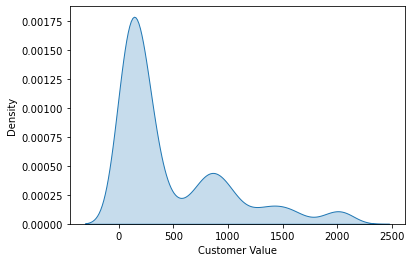

In [120]:
sns.kdeplot(x = df['Customer Value'], fill = True)

In [121]:
# Finding out outliers using zscore method

In [122]:
print(get_outliers(df['Customer Value']))

[2056.88, 2071.575, 2079.4, 2034.36, 2046.24, 2100.16, 2022.885, 2127.68, 2108.4, 2129.535, 2165.28, 2100.52, 2120.67, 2022.48, 2024.64, 2035.305, 2117.72, 2056.88, 2071.575, 2056.88, 2071.575, 2026.08, 2038.96, 2051.415, 2059.72, 2074.77, 2087.24, 2105.73, 2067.96, 2084.04, 2124.84, 2148.03, 2149.28, 2060.08, 2075.175, 2048.68, 2077.28, 2094.525, 2026.08, 2026.08, 2097.32, 2074.8, 2054.04, 2026.52, 2037.42, 2148.84, 2045.8, 2140.96, 2053.68, 2065.08, 2080.8, 2097.32, 2097.32]


<AxesSubplot:xlabel='Customer Value'>

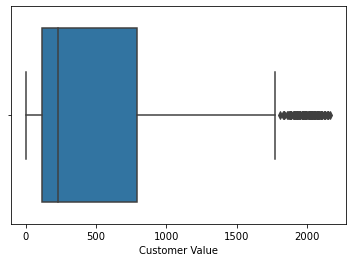

In [123]:
sns.boxplot(x = df['Customer Value'])

In [124]:
# iqr (Interquantile Method) method

In [125]:
q1 = df['Customer Value'].quantile(0.25)
q2 = df['Customer Value'].quantile(0.50)
q3 = df['Customer Value'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Upper tail :",upper_tail)
print("Lower tail :",lower_tail)

Upper tail : 1800.2700000000002
Lower tail : -898.0800000000002


In [126]:
# Checking Skewness

In [127]:
df['Customer Value'].skew()

1.4272916100327098

In [128]:
# Highly Positively Skewed 

In [129]:
# We can see outliers here so we need to reduce the impact of these outliers using some transformation technique

### 14) Churn

In [130]:
# df['Churn'] : This is our target varaible

In [131]:
df['Churn']

0       0
1       0
2       0
3       0
4       0
       ..
3145    0
3146    0
3147    0
3148    0
3149    1
Name: Churn, Length: 3150, dtype: int64

In [132]:
df['Churn'].isna().sum()

0

In [133]:
# Target feature do not contain any null values

In [134]:
# Checking for balanced data

In [135]:
df['Churn'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Churn', ylabel='count'>

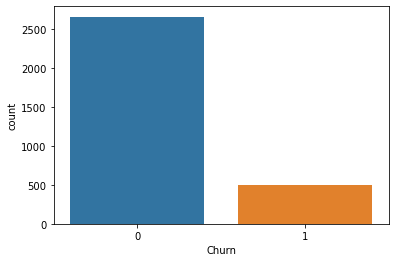

In [136]:
sns.countplot(x = df['Churn'])

In [137]:
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [138]:
N_0 = 2655/(2655+495)
N_0

0.8428571428571429

In [139]:
Y_1 = 495/(2655+495)
Y_1

0.15714285714285714

In [140]:
# Target feature is not balanced so it need to balance using some resampling techniques for 
# better performance. If we are not balancing this data then we could get baised model towards
# one result only

# Feature Engineering

### 1) Handling the Outliers present in feature df['Call  Failure']

<AxesSubplot:xlabel='Call  Failure'>

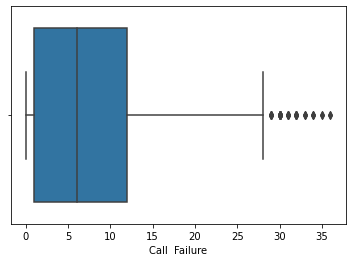

In [141]:
sns.boxplot(x = df['Call  Failure'])

<AxesSubplot:xlabel='Call  Failure'>

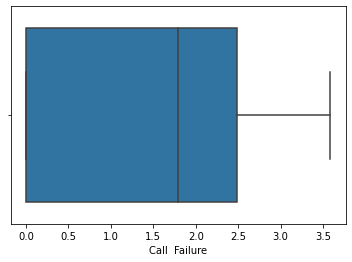

In [142]:
sns.boxplot(x = np.log(df['Call  Failure']))

<AxesSubplot:xlabel='Call  Failure'>

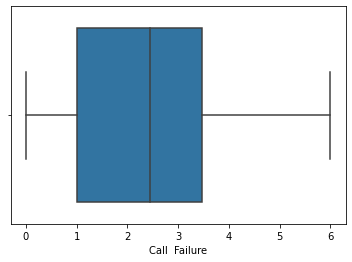

In [143]:
sns.boxplot(x = np.sqrt(df['Call  Failure']))

<AxesSubplot:xlabel='Call  Failure'>

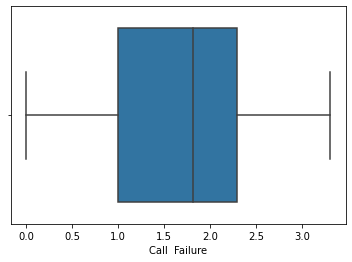

In [144]:
sns.boxplot(x = np.cbrt(df['Call  Failure']))

<AxesSubplot:xlabel='Call  Failure'>

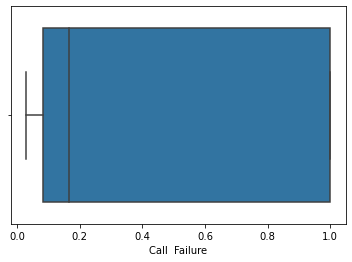

In [145]:
sns.boxplot(x = 1/(df['Call  Failure']))

In [146]:
# Applying cuberoot transformation to this feature

In [147]:
df['Call  Failure'] = np.cbrt(df['Call  Failure'])

<AxesSubplot:xlabel='Call  Failure'>

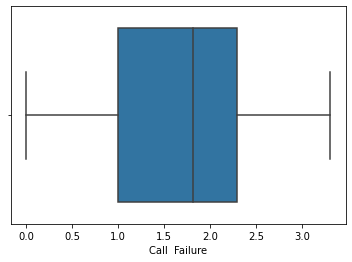

In [148]:
sns.boxplot(x = df['Call  Failure'])

In [149]:
# Checking Skew

In [150]:
df['Call  Failure'].skew()

-0.6106389178678985

In [151]:
# No Skew : Symmetrical Distribution 

### 2) Handling the Outliers present in feature df['Subscription  Length']

<AxesSubplot:xlabel='Subscription  Length'>

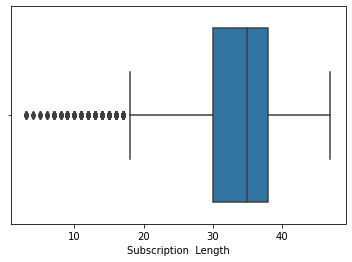

In [152]:
sns.boxplot(x = df['Subscription  Length'])

<AxesSubplot:xlabel='Subscription  Length'>

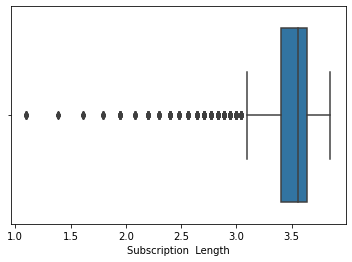

In [153]:
sns.boxplot(x = np.log(df['Subscription  Length']))

<AxesSubplot:xlabel='Subscription  Length'>

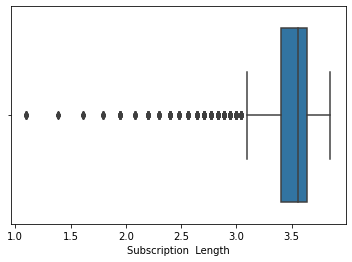

In [154]:
sns.boxplot(x = np.log(df['Subscription  Length']))

<AxesSubplot:xlabel='Subscription  Length'>

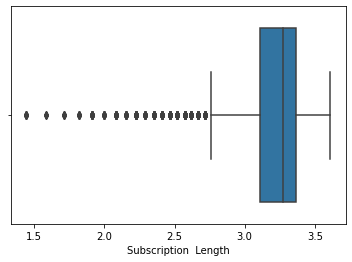

In [155]:
sns.boxplot(x = np.cbrt(df['Subscription  Length']))

<AxesSubplot:>

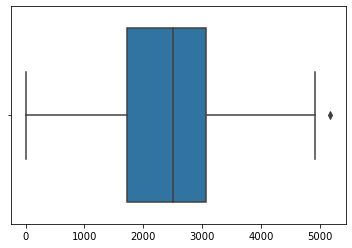

In [156]:
sns.boxplot(x = boxcox(df['Subscription  Length'])[0])

<AxesSubplot:xlabel='Subscription  Length'>

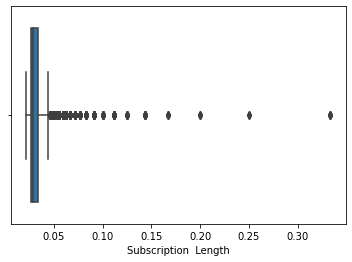

In [157]:
sns.boxplot(x = 1/(df['Subscription  Length']))

In [158]:
# Applying boxcox transformation to this feature

In [159]:
df['Subscription  Length'], boxcox_lambda_val_Subscription_Length = boxcox(df['Subscription  Length'])

<AxesSubplot:xlabel='Subscription  Length'>

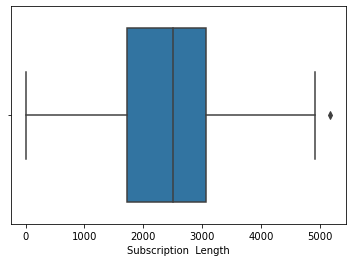

In [160]:
sns.boxplot(x = df['Subscription  Length'])

In [161]:
# Checking Skew

In [162]:
df['Subscription  Length'].skew()

-0.3759906806462353

In [163]:
# No Skew : Symmetricl Distributiona

In [164]:
# Outliers handled succesfully

### 3) Handling the Outliers present in feature df['Seconds of Use']

<AxesSubplot:xlabel='Seconds of Use'>

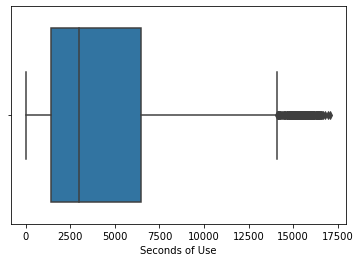

In [165]:
sns.boxplot(x = df['Seconds of Use'])

<AxesSubplot:xlabel='Seconds of Use'>

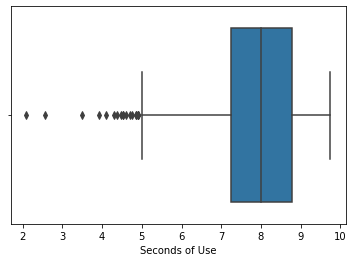

In [166]:
sns.boxplot(x = np.log(df['Seconds of Use']))

<AxesSubplot:xlabel='Seconds of Use'>

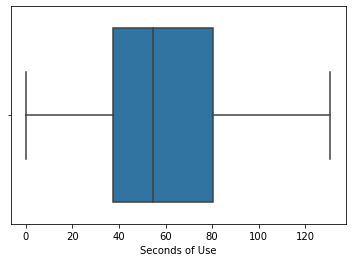

In [167]:
sns.boxplot(x = np.sqrt(df['Seconds of Use']))

<AxesSubplot:xlabel='Seconds of Use'>

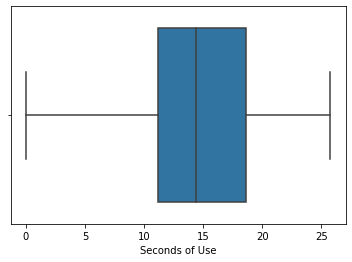

In [168]:
sns.boxplot(x = np.cbrt(df['Seconds of Use']))

<AxesSubplot:xlabel='Seconds of Use'>

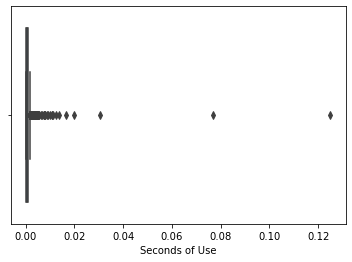

In [169]:
sns.boxplot(x = 1/(df['Seconds of Use']))

In [170]:
# Applying square root transformation to this feature

In [171]:
df['Seconds of Use'] = np.sqrt(df['Seconds of Use'])

<AxesSubplot:xlabel='Seconds of Use'>

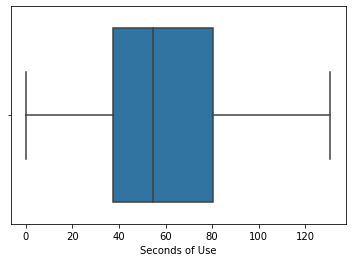

In [172]:
sns.boxplot(x = df['Seconds of Use'])

In [173]:
# Checking Skew

In [174]:
df['Seconds of Use'].skew()

0.33597322511474725

In [175]:
# No Skew : Symmetricl Distributiona

In [176]:
# Outliers handled succesfully

### 4) Handling the Outliers present in feature df['Frequency of use']

<AxesSubplot:xlabel='Frequency of use'>

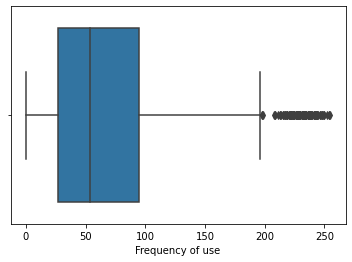

In [177]:
sns.boxplot(x = df['Frequency of use'])

<AxesSubplot:xlabel='Frequency of use'>

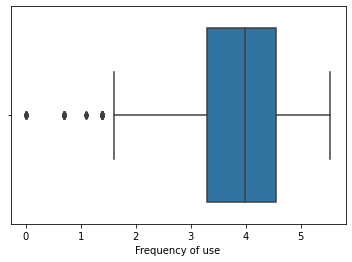

In [178]:
sns.boxplot(x = np.log(df['Frequency of use']))

<AxesSubplot:xlabel='Frequency of use'>

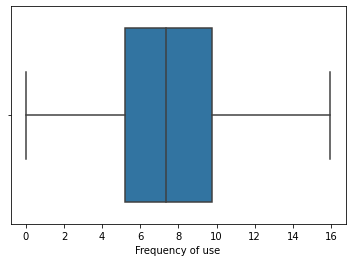

In [179]:
sns.boxplot(x = np.sqrt(df['Frequency of use']))

<AxesSubplot:xlabel='Frequency of use'>

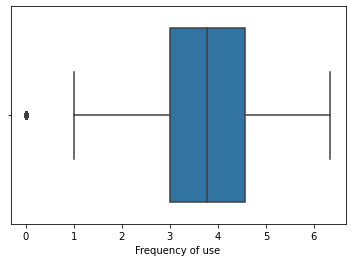

In [180]:
sns.boxplot(x = np.cbrt(df['Frequency of use']))

<AxesSubplot:xlabel='Frequency of use'>

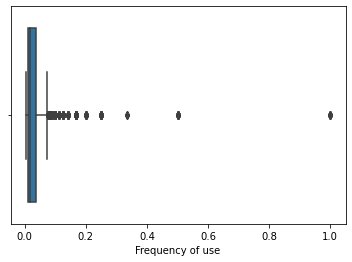

In [181]:
sns.boxplot(x = 1/(df['Frequency of use']))

In [182]:
# Applying square root transformation to this feature

In [183]:
df['Frequency of use'] = np.sqrt(df['Frequency of use'])

<AxesSubplot:xlabel='Frequency of use'>

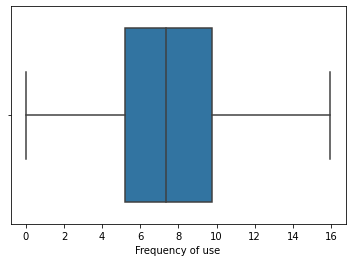

In [184]:
sns.boxplot(x = df['Frequency of use'])

In [185]:
# Checking Skew

In [186]:
df['Frequency of use'].skew()

0.05473792557899594

In [187]:
# No Skew : Symmetricl Distributiona

### 5) Handling the Outliers present in feature df['Frequency of SMS']

<AxesSubplot:xlabel='Frequency of SMS'>

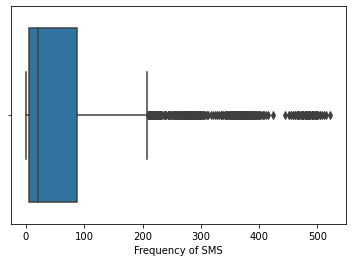

In [188]:
sns.boxplot(x = df['Frequency of SMS'])

<AxesSubplot:xlabel='Frequency of SMS'>

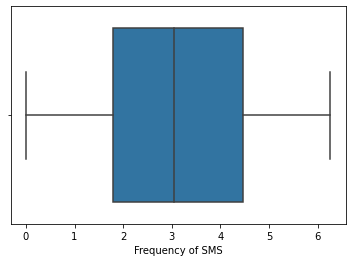

In [189]:
sns.boxplot(x = np.log(df['Frequency of SMS']))

<AxesSubplot:xlabel='Frequency of SMS'>

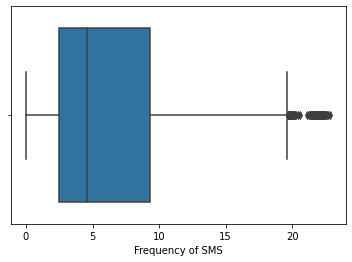

In [190]:
sns.boxplot(x = np.sqrt(df['Frequency of SMS']))

<AxesSubplot:xlabel='Frequency of SMS'>

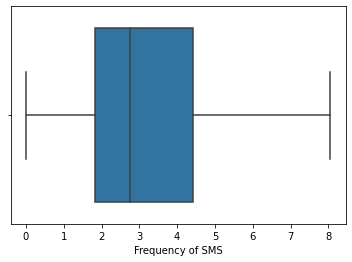

In [191]:
sns.boxplot(x = np.cbrt(df['Frequency of SMS']))

<AxesSubplot:xlabel='Frequency of SMS'>

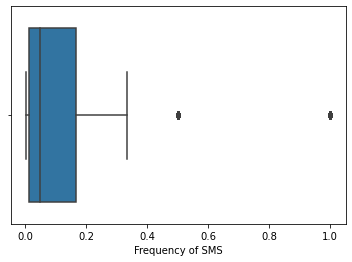

In [192]:
sns.boxplot(x = 1/(df['Frequency of SMS']))

In [193]:
# Applying cuberoot transformation to this feature

In [194]:
df['Frequency of SMS'] = np.cbrt(df['Frequency of SMS'])

<AxesSubplot:xlabel='Frequency of SMS'>

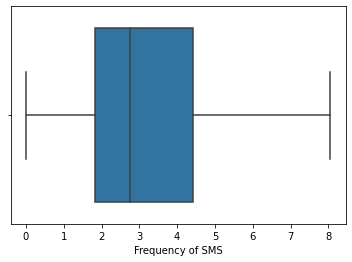

In [195]:
sns.boxplot(x = df['Frequency of SMS'])

In [196]:
# Checking Skew

In [197]:
df['Frequency of SMS'].skew()

0.3641242200596897

In [198]:
# No Skew : Symmetricl Distributiona

In [199]:
# Now our feature lookslike balanced comparing before one

### 6) Handling the Outliers present in feature df['Distinct Called Numbers']

<AxesSubplot:xlabel='Distinct Called Numbers'>

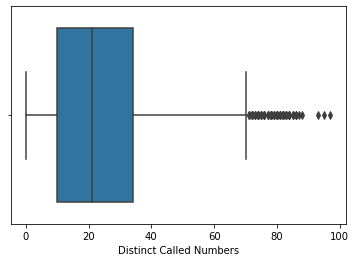

In [200]:
sns.boxplot(x = df['Distinct Called Numbers'])

<AxesSubplot:xlabel='Distinct Called Numbers'>

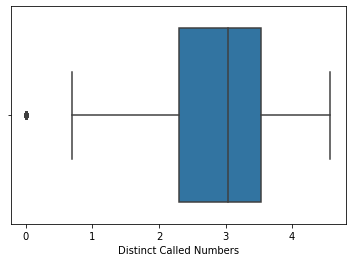

In [201]:
sns.boxplot(x = np.log(df['Distinct Called Numbers']))

<AxesSubplot:xlabel='Distinct Called Numbers'>

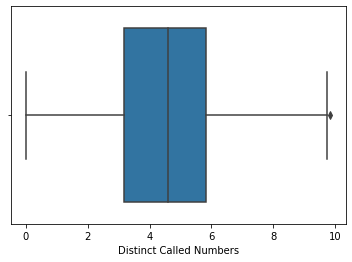

In [202]:
sns.boxplot(x = np.sqrt(df['Distinct Called Numbers']))

<AxesSubplot:xlabel='Distinct Called Numbers'>

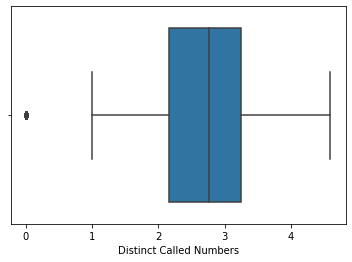

In [203]:
sns.boxplot(x = np.cbrt(df['Distinct Called Numbers']))

<AxesSubplot:xlabel='Distinct Called Numbers'>

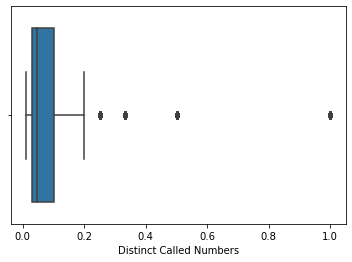

In [204]:
sns.boxplot(x = 1/(df['Distinct Called Numbers']))

In [205]:
# Applying square root transformation to this feature

In [206]:
df['Distinct Called Numbers'] = np.sqrt(df['Distinct Called Numbers'])

<AxesSubplot:xlabel='Distinct Called Numbers'>

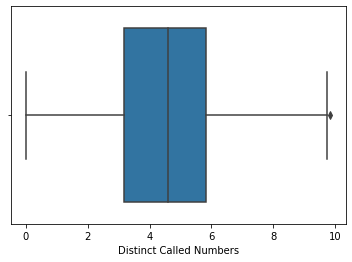

In [207]:
sns.boxplot(x = df['Distinct Called Numbers'])

In [208]:
# Checking Skew

In [209]:
df['Distinct Called Numbers'].skew()

-0.23991568494018728

In [210]:
# No Skew : Symmetricl Distributiona

### 7) Dropping Feature df['Age']

In [211]:
df.drop('Age', axis = 1, inplace = True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   float64
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   float64
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   float64
 5   Frequency of use         3150 non-null   float64
 6   Frequency of SMS         3150 non-null   float64
 7   Distinct Called Numbers  3150 non-null   float64
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 320.0 KB


In [213]:
# Successfully dropped feature df['Age']

### 8) Handling the Outliers present in feature df['Customer Value']

<AxesSubplot:xlabel='Customer Value'>

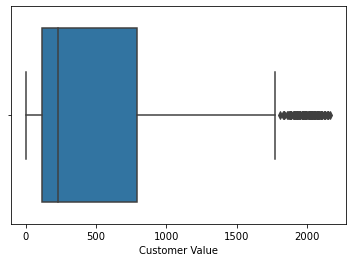

In [214]:
sns.boxplot(x = df['Customer Value'])

<AxesSubplot:xlabel='Customer Value'>

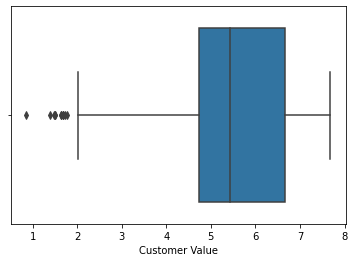

In [215]:
sns.boxplot(x = np.log(df['Customer Value']))

<AxesSubplot:xlabel='Customer Value'>

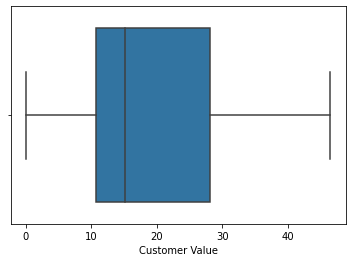

In [216]:
sns.boxplot(x = np.sqrt(df['Customer Value']))

<AxesSubplot:xlabel='Customer Value'>

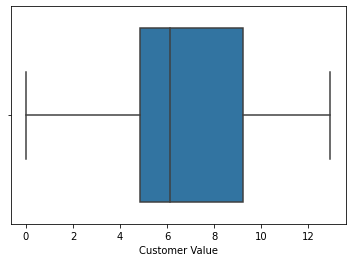

In [217]:
sns.boxplot(x = np.cbrt(df['Customer Value']))

<AxesSubplot:xlabel='Customer Value'>

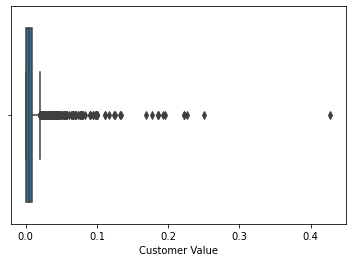

In [218]:
sns.boxplot(x = 1/(df['Customer Value']))

In [219]:
# Applying square root transformation to this feature

In [220]:
df['Customer Value'] = np.sqrt(df['Customer Value'])

<AxesSubplot:xlabel='Customer Value'>

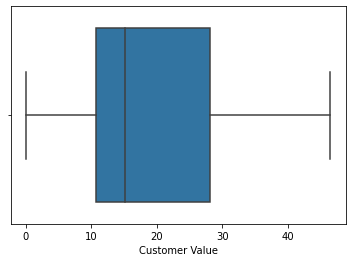

In [221]:
sns.boxplot(x = df['Customer Value'])

In [222]:
# Checking Skew

In [223]:
df['Customer Value'].skew()

0.6237200901031904

In [224]:
# No Skew : Symmetrical Distribution 

### 9) Balancing target variable values df['Churn']

In [225]:
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [226]:
N_0 = 2655/(2655+495)
N_0

0.8428571428571429

In [227]:
Y_1 = 495/(2655+495)
Y_1

0.15714285714285714

<AxesSubplot:xlabel='Churn', ylabel='count'>

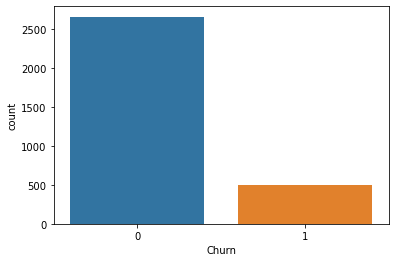

In [228]:
sns.countplot(df['Churn'])

### Splitting data

In [229]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [230]:
smt = SMOTE(sampling_strategy = 0.55)
x_samples, y_samples = smt.fit_resample(x,y)
y_samples.value_counts()

0    2655
1    1460
Name: Churn, dtype: int64

In [231]:
N_0 = 2655/(2655+1460)
N_0

0.6452004860267315

In [232]:
Y_1 = 1460/(2655+1460)
Y_1

0.35479951397326853

In [233]:
df1 = x_samples
df1['Churn'] = y_samples
df1

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0          2.000000          0           3071.552503               0   
1          0.000000          0           3273.777286               0   
2          2.154435          0           2876.921379               0   
3          2.154435          0           3071.552503               0   
4          1.442250          0           3071.552503               0   
...             ...        ...                   ...             ...   
4110       3.049734          1           3273.777286               0   
4111       2.403606          0           2876.921379               0   
4112       1.939023          1            146.151365               2   
4113       1.146800          0           2876.921379               0   
4114       2.614547          1           1863.380985               0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0          66.105976          8.426150          1.709976   
1          17.832555          2.236068          1.912931   
2          49.527770          7.745967          7.107194   
3          64.791975          8.124038          1.000000   
4          48.918299          7.615773          1.259921   
...              ...               ...               ...   
4110       35.500397          7.500667          3.165720   
4111       57.311145          6.851684          2.486979   
4112       41.562800          4.966317          1.275112   
4113       14.560108          1.179568          2.104438   
4114       25.246611          6.398301          1.952382   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Customer Value  \
0                    4.123106          3            1       1       14.058449   
1                    2.000000          2            1       2        6.784910   
2                    4.898979          3            1       1       39.198469   
3                    5.916080          1            1       1       15.492579   
4                    5.744563          1            1       1       12.074974   
...                       ...        ...          ...     ...             ...   
4110                 4.795832          3            1       2       13.400745   
4111                 4.222624          3            1       2       13.970604   
4112                 2.816446          3            1       1        9.377361   
4113                 1.814087          2            1       2        6.981979   
4114                 3.847881          2            1       2        8.233126   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
4110      1  
4111      1  
4112      1  
4113      1  
4114      1  

[4115 rows x 13 columns]

<AxesSubplot:xlabel='Churn', ylabel='count'>

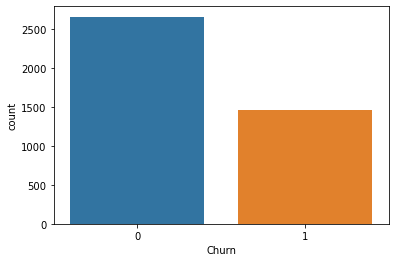

In [234]:
sns.countplot(df1['Churn'])

In [235]:
# We got a new dataset which is more balanced than before using SMOTE over sampling technique

In [236]:
# We have performed all the preprocessing techniques over the dataset, now we are ready to build model

In [237]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            4115 non-null   float64
 1   Complains                4115 non-null   int64  
 2   Subscription  Length     4115 non-null   float64
 3   Charge  Amount           4115 non-null   int64  
 4   Seconds of Use           4115 non-null   float64
 5   Frequency of use         4115 non-null   float64
 6   Frequency of SMS         4115 non-null   float64
 7   Distinct Called Numbers  4115 non-null   float64
 8   Age Group                4115 non-null   int64  
 9   Tariff Plan              4115 non-null   int64  
 10  Status                   4115 non-null   int64  
 11  Customer Value           4115 non-null   float64
 12  Churn                    4115 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 418.1 KB


In [238]:
# Finding correlation between features

<AxesSubplot:>

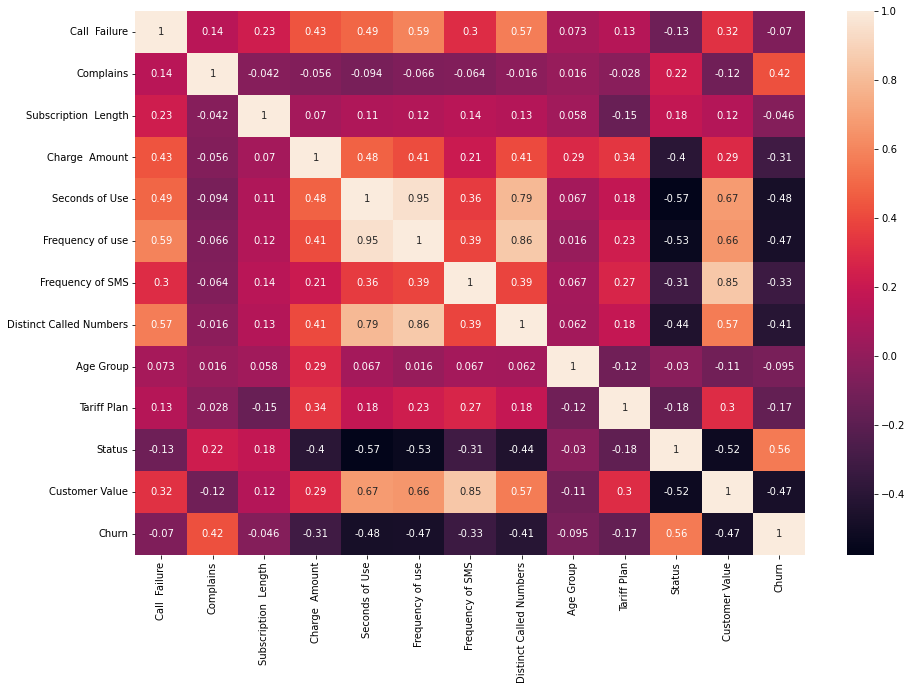

In [239]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), annot = True)

### Splitting data

In [240]:
x = df1.drop('Churn', axis = 1)
y = df1['Churn']

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1, stratify=y)

In [242]:
x_train

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
2424       2.351335          0           2014.420600               1   
3507       0.383918          0           3071.552503               0   
3977       2.610942          0           1316.006622               0   
470        2.223980          0           2876.921379               3   
319        0.000000          0           1863.380985               0   
...             ...        ...                   ...             ...   
2105       2.519842          0           3483.685884               2   
2104       2.000000          0           3483.685884               1   
3445       0.000000          0             47.924557               0   
3595       0.000000          0           2876.921379               0   
3005       2.154435          0           3273.777286               1   

      Seconds of Use  Frequency of use  Frequency of SMS  \
2424       76.570229          9.695360          2.620741   
3507       18.429139          1.866217          2.135182   
3977       26.278572          6.066574          1.000000   
470       109.840794         12.806248          3.174802   
319        85.135187         10.816654          7.172581   
...              ...               ...               ...   
2105       63.874878          9.380832          3.391211   
2104       51.942276          8.000000          2.080084   
3445       37.560031          3.973517          0.000000   
3595        0.000000          0.000000          0.000000   
3005       58.051701          8.774964          2.410142   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Customer Value  
2424                 4.472136          2            1       1       18.683281  
3507                 2.329838          3            1       1        6.056243  
3977                 3.357906          2            1       2        6.101794  
470                  7.874008          4            1       1       19.639883  
319                  6.082763          2            1       1       44.630987  
...                       ...        ...          ...     ...             ...  
2105                 5.477226          3            1       1       17.964409  
2104                 5.916080          2            1       1       12.837056  
3445                 2.236068          2            1       1        7.582083  
3595                 0.000000          2            1       1        0.000000  
3005                 5.477226          3            1       1       13.924080  

[3292 rows x 12 columns]

# Model Training

### 1. Logistic Regression

In [243]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [244]:
# Testing Accuracy

y_pred = log_reg.predict(x_test)

log_reg_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",log_reg_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.8323207776427703

Confusion Matrix :
 [[473  58]
 [ 80 212]]

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       531
           1       0.79      0.73      0.75       292

    accuracy                           0.83       823
   macro avg       0.82      0.81      0.81       823
weighted avg       0.83      0.83      0.83       823



In [245]:
# Training Accuracy

y_train_pred = log_reg.predict(x_train)

log_reg_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",log_reg_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.8338396111786148

Confusion Matrix :
 [[1838  286]
 [ 261  907]]

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      2124
           1       0.76      0.78      0.77      1168

    accuracy                           0.83      3292
   macro avg       0.82      0.82      0.82      3292
weighted avg       0.83      0.83      0.83      3292



### 2. K Nearest Neighbour

In [246]:
# We need to scale the data for KNN Regressor

In [247]:
norm_scaler = MinMaxScaler()
norm_array = norm_scaler.fit_transform(x_train)
x_train_norm_df = pd.DataFrame(norm_array, columns=x.columns)
# x_train_norm_df

In [248]:
norm_array = norm_scaler.transform(x_test)
x_test_norm_df = pd.DataFrame(norm_array, columns=x.columns)
# x_test_norm_df

In [249]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_norm_df,y_train)

KNeighborsClassifier()

In [250]:
# Testing Accuracy

y_pred = knn_model.predict(x_test_norm_df)

knn_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",knn_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9428918590522479

Confusion Matrix :
 [[500  31]
 [ 16 276]]

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       531
           1       0.90      0.95      0.92       292

    accuracy                           0.94       823
   macro avg       0.93      0.94      0.94       823
weighted avg       0.94      0.94      0.94       823



In [251]:
# Training Accuracy

y_train_pred = knn_model.predict(x_train_norm_df)

knn_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",knn_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9559538274605103

Confusion Matrix :
 [[2034   90]
 [  55 1113]]

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2124
           1       0.93      0.95      0.94      1168

    accuracy                           0.96      3292
   macro avg       0.95      0.96      0.95      3292
weighted avg       0.96      0.96      0.96      3292



### Hyperparameter Tuning

In [252]:
knn_clf = KNeighborsClassifier()

hyperparameters = {'n_neighbors':np.arange(2,31), 'p':[1,2]}

rscv_knn_model = RandomizedSearchCV(knn_clf, hyperparameters, cv = 5)
rscv_knn_model.fit(x_train_norm_df, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'p': [1, 2]})

In [253]:
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [254]:
knn_model_hyp = rscv_knn_model.best_estimator_
knn_model_hyp.fit(x_train_norm_df, y_train)

KNeighborsClassifier(n_neighbors=3)

In [255]:
# Testing Accuracy

y_pred = knn_model_hyp.predict(x_test_norm_df)

knn_hyp_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",knn_hyp_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9489671931956257

Confusion Matrix :
 [[505  26]
 [ 16 276]]

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       531
           1       0.91      0.95      0.93       292

    accuracy                           0.95       823
   macro avg       0.94      0.95      0.94       823
weighted avg       0.95      0.95      0.95       823



In [256]:
# Training Accuracy

y_train_pred = knn_model_hyp.predict(x_train_norm_df)

knn_hyp_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",knn_hyp_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.965370595382746

Confusion Matrix :
 [[2055   69]
 [  45 1123]]

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2124
           1       0.94      0.96      0.95      1168

    accuracy                           0.97      3292
   macro avg       0.96      0.96      0.96      3292
weighted avg       0.97      0.97      0.97      3292



### 3. Decision Tree

In [257]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [258]:
# Testing Accuracy

y_pred = dt_model.predict(x_test)

dt_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",dt_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9416767922235723

Confusion Matrix :
 [[507  24]
 [ 24 268]]

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       531
           1       0.92      0.92      0.92       292

    accuracy                           0.94       823
   macro avg       0.94      0.94      0.94       823
weighted avg       0.94      0.94      0.94       823



In [259]:
# Training Accuracy

y_train_pred = dt_model.predict(x_train)

dt_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",dt_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9917982989064399

Confusion Matrix :
 [[2103   21]
 [   6 1162]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2124
           1       0.98      0.99      0.99      1168

    accuracy                           0.99      3292
   macro avg       0.99      0.99      0.99      3292
weighted avg       0.99      0.99      0.99      3292



### Hyperparameter Tuning

In [260]:
dt_clf = DecisionTreeClassifier(random_state = 20)

hyperparameters = {'criterion' : ['gini', 'entropy'],
                   'max_depth' : np.arange(3,8),
                   'min_samples_split' : np.arange(2,20),
                   'min_samples_leaf' : np.arange(2,10)}

rscv_dt_model = RandomizedSearchCV(dt_clf, hyperparameters, cv = 5)
rscv_dt_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [261]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=7,
                       random_state=20)

In [262]:
dt_model_hyp = rscv_dt_model.best_estimator_
dt_model_hyp.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=7,
                       random_state=20)

In [263]:
# Testing Accuracy

y_pred = dt_model_hyp.predict(x_test)

dt_hyp_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",dt_hyp_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.8930741190765492

Confusion Matrix :
 [[480  51]
 [ 37 255]]

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       531
           1       0.83      0.87      0.85       292

    accuracy                           0.89       823
   macro avg       0.88      0.89      0.88       823
weighted avg       0.89      0.89      0.89       823



In [264]:
# Training Accuracy

y_train_pred = dt_model_hyp.predict(x_train)

dt_hyp_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",dt_hyp_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9049210206561361

Confusion Matrix :
 [[1938  186]
 [ 127 1041]]

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2124
           1       0.85      0.89      0.87      1168

    accuracy                           0.90      3292
   macro avg       0.89      0.90      0.90      3292
weighted avg       0.91      0.90      0.91      3292



### 4. Random Forest

In [265]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [266]:
# Testing Accuracy

y_pred = rf_model.predict(x_test)

rf_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",rf_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9671931956257594

Confusion Matrix :
 [[518  13]
 [ 14 278]]

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.96      0.95      0.95       292

    accuracy                           0.97       823
   macro avg       0.96      0.96      0.96       823
weighted avg       0.97      0.97      0.97       823



In [267]:
# Training Accuracy

y_train_pred = rf_model.predict(x_train)

rf_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",rf_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9917982989064399

Confusion Matrix :
 [[2101   23]
 [   4 1164]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2124
           1       0.98      1.00      0.99      1168

    accuracy                           0.99      3292
   macro avg       0.99      0.99      0.99      3292
weighted avg       0.99      0.99      0.99      3292



### Hyperparameter Tuning

In [268]:
rf_clf = RandomForestClassifier(random_state=1)

hyp = {'criterion' : ['gini', 'entropy'],
       'max_depth' : np.arange(2,10),
       'min_samples_split' : np.arange(2,10),
       'min_samples_leaf' : np.arange(1,10),
       'n_estimators' : np.arange(10,100)}

rscv_rf_model = RandomizedSearchCV(rf_clf, hyp, cv = 5)
rscv_rf_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [269]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=46, random_state=1)

In [270]:
rf_model_hyp = rscv_rf_model.best_estimator_
rf_model_hyp.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=46, random_state=1)

In [271]:
# Testing Accuracy

y_pred = rf_model_hyp.predict(x_test)

rf_hyp_test_acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",rf_hyp_test_acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9465370595382746

Confusion Matrix :
 [[506  25]
 [ 19 273]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       531
           1       0.92      0.93      0.93       292

    accuracy                           0.95       823
   macro avg       0.94      0.94      0.94       823
weighted avg       0.95      0.95      0.95       823



In [272]:
# Training Accuracy

y_train_pred = rf_model_hyp.predict(x_train)

rf_hyp_train_acc_score = accuracy_score(y_train,y_train_pred)
print("Accuracy Score :",rf_hyp_train_acc_score)

cnf_matrix = confusion_matrix(y_train,y_train_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clf_report = classification_report(y_train,y_train_pred)
print("\nClassification Report :\n",clf_report)

Accuracy Score : 0.9495747266099636

Confusion Matrix :
 [[2014  110]
 [  56 1112]]

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2124
           1       0.91      0.95      0.93      1168

    accuracy                           0.95      3292
   macro avg       0.94      0.95      0.95      3292
weighted avg       0.95      0.95      0.95      3292



In [273]:
accuracy_df = pd.DataFrame({'Model_Name' : ['log_reg','knn_model','knn_model_hyp','dt_model','dt_model_hyp','rf_model',
                                       'rf_model_hyp'],
                    'Testing_Accuracy' : [log_reg_test_acc_score, knn_test_acc_score, knn_hyp_test_acc_score,
                                          dt_test_acc_score, dt_hyp_test_acc_score, rf_test_acc_score, rf_hyp_test_acc_score],
                    'Training _Accuracy' : [log_reg_train_acc_score, knn_train_acc_score, knn_hyp_train_acc_score,
                                            dt_train_acc_score, dt_hyp_train_acc_score, rf_train_acc_score, rf_hyp_train_acc_score]})

accuracy_df

Model_Name  Testing_Accuracy  Training _Accuracy
0        log_reg          0.832321            0.833840
1      knn_model          0.942892            0.955954
2  knn_model_hyp          0.948967            0.965371
3       dt_model          0.941677            0.991798
4   dt_model_hyp          0.893074            0.904921
5       rf_model          0.967193            0.991798
6   rf_model_hyp          0.946537            0.949575

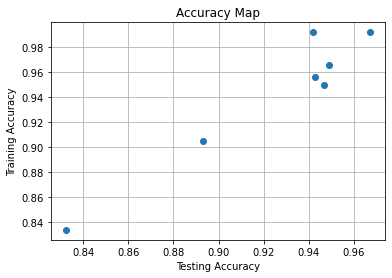

In [274]:
plt.scatter(accuracy_df['Testing_Accuracy'], accuracy_df['Training _Accuracy'])
plt.xlabel("Testing Accuracy")
plt.ylabel("Training Accuracy")
plt.title("Accuracy Map")
plt.grid()
plt.show()

In [275]:
# Choosing a optimal model which is having good Testing and Training Accuracy and is not overfitting

### Exporting Model and Object Files

In [276]:
file = open('rf_model_hyp.pkl', 'wb')
pickle.dump(rf_model_hyp, file)
file.close()

In [277]:
columns_list = x.columns
columns_list

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value'],
      dtype='object')

In [278]:
file = open("columns_list.obj", 'wb')
pickle.dump(columns_list, file)
file.close()

# Tesing data

In [279]:
df1[15:17]

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
15        1.44225          0           2876.921379               1   
16        0.00000          0           2876.921379               0   

    Seconds of Use  Frequency of use  Frequency of SMS  \
15       80.622577          9.273618          5.708267   
16       29.580399          3.741657          0.000000   

    Distinct Called Numbers  Age Group  Tariff Plan  Status  Customer Value  \
15                 5.099020          3            1       1       31.740195   
16                 3.316625          2            1       2        6.324951   

    Churn  
15      0  
16      1

In [280]:
def subscription_length_transformer(sl):
    
    boxcox_lambda_val_Subscription_Length = 2.4543572516155967
    New = ((sl**boxcox_lambda_val_Subscription_Length) - 1) / boxcox_lambda_val_Subscription_Length
    
    return New

In [282]:
sl = subscription_length_transformer(33)
sl

2172.483465494627

In [283]:
call_failure = np.cbrt(23)
complains = 1
subscription_length = sl
charge_amount = 0
seconds_of_use = np.sqrt(955)
frequency_of_use = np.sqrt(47)
frequency_of_SMS = np.cbrt(16)
distinct_called_numbers = np.sqrt(17)
age_group = 2
tariff_plan = 1
status = 2
customer_value = np.sqrt(117.09)

In [284]:
test_df = pd.DataFrame({'Call  Failure':[call_failure], 'Complains':[complains], 'Subscription  Length':[sl],
                        'Charge  Amount':[charge_amount], 'Seconds of Use':[seconds_of_use], 'Frequency of use':[frequency_of_use],
                        'Frequency of SMS':[frequency_of_SMS], 'Distinct Called Numbers':[distinct_called_numbers],
                        'Age Group':[age_group], 'Tariff Plan':[tariff_plan], 'Status':[status], 'Customer Value':[customer_value]})

test_df

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0       2.843867          1           2172.483465               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0       30.903074          6.855655          2.519842   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Customer Value  
0                 4.123106          2            1       2       10.820813

In [286]:
prediction = rf_model_hyp.predict(test_df)
prediction[0]

1